In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from statsmodels.stats.proportion import proportions_ztest

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [4]:
data = pd.read_excel('результаты А_B.xlsx')

In [5]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [7]:
data.info

<bound method DataFrame.info of         userid  version  sum_gamerounds  retention_1  retention_7
0          116  gate_30               3            0            0
1          337  gate_30              38            1            0
2          377  gate_40             165            1            0
3          483  gate_40               1            0            0
4          488  gate_40             179            1            1
...        ...      ...             ...          ...          ...
90184  9999441  gate_40              97            1            0
90185  9999479  gate_40              30            0            0
90186  9999710  gate_30              28            1            0
90187  9999768  gate_40              51            1            0
90188  9999861  gate_40              16            0            0

[90189 rows x 5 columns]>

# 1. Оценка среднего количества игровых раундов (sum_gamerounds):

In [8]:
# Просмотр данных для проверки структуры
print(data.head())

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3            0            0
1     337  gate_30              38            1            0
2     377  gate_40             165            1            0
3     483  gate_40               1            0            0
4     488  gate_40             179            1            1


In [9]:
# Вычисление среднего количества игровых раундов для каждой версии игры
mean_rounds = data.groupby('version')['sum_gamerounds'].mean()

print("Среднее количество игровых раундов по версиям:")
print(mean_rounds)


Среднее количество игровых раундов по версиям:
version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64


In [11]:
from scipy.stats import ttest_ind

# Разделение данных на две группы
gate_30_rounds = data[data['version'] == 'gate_30']['sum_gamerounds']
gate_40_rounds = data[data['version'] == 'gate_40']['sum_gamerounds']

In [12]:
# Проведение t-теста
t_statistic, p_value = ttest_ind(gate_30_rounds, gate_40_rounds)

print(f"t-статистика: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Различия статистически значимы.")
else:
    print("Различия не являются статистически значимыми.")


t-статистика: 0.8910426211362967
p-value: 0.37290868247405207
Различия не являются статистически значимыми.


# 2. Оценка уровня удержания (retention):

In [14]:
# Вычисление процента удержания через 1 день для каждой версии
retention_1 = data.groupby('version')['retention_1'].mean() * 100

print("Процент удержания через 1 день по версиям:")
print(retention_1)

Процент удержания через 1 день по версиям:
version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64


In [15]:


# Вычисление процента удержания через 7 дней для каждой версии
retention_7 = data.groupby('version')['retention_7'].mean() * 100

print("Процент удержания через 7 дней по версиям:")
print(retention_7)


Процент удержания через 7 дней по версиям:
version
gate_30    19.020134
gate_40    18.200004
Name: retention_7, dtype: float64


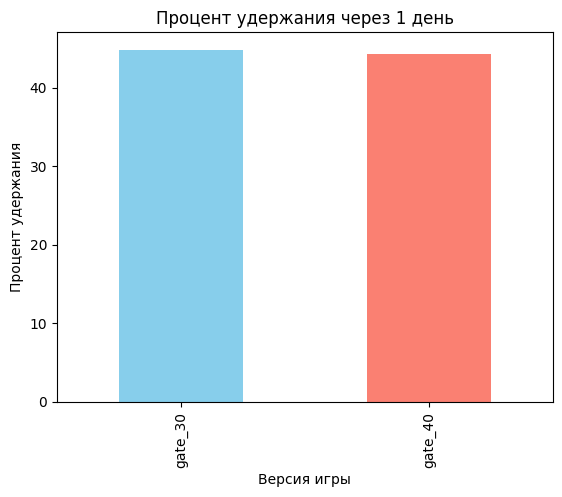

In [19]:
# Визуализация процента удержания через 1 день
retention_1.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Процент удержания через 1 день')
plt.xlabel('Версия игры')
plt.ylabel('Процент удержания')
plt.show()


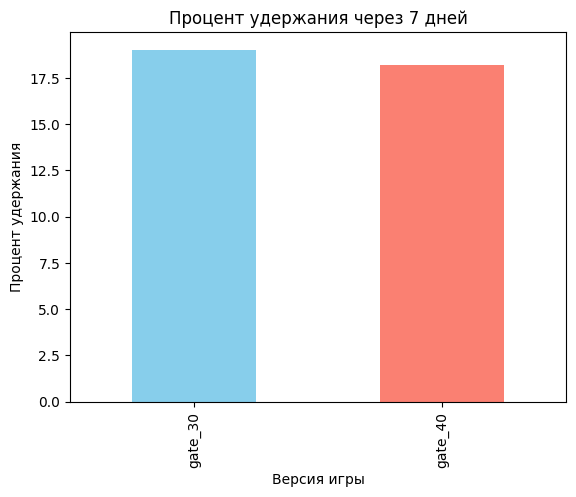

In [17]:
# Визуализация процента удержания через 7 дней
retention_7.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Процент удержания через 7 дней')
plt.xlabel('Версия игры')
plt.ylabel('Процент удержания')
plt.show()

In [20]:
# Данные для z-теста
counts_1 = data.groupby('version')['retention_1'].sum()
nobs_1 = data.groupby('version')['retention_1'].count()
counts_7 = data.groupby('version')['retention_7'].sum()
nobs_7 = data.groupby('version')['retention_7'].count()

In [23]:
# Z-тест для удержания через 1 день
z_stat_1, p_value_1 = proportions_ztest(count=counts_1, nobs=nobs_1)
print(f"Z-статистика для удержания через 1 день: {z_stat_1}")
print(f"p-value для удержания через 1 день: {p_value_1}")

Z-статистика для удержания через 1 день: 1.7840862247974725
p-value для удержания через 1 день: 0.07440965529691913


In [24]:
# Z-тест для удержания через 7 дней
z_stat_7, p_value_7 = proportions_ztest(count=counts_7, nobs=nobs_7)
print(f"Z-статистика для удержания через 7 дней: {z_stat_7}")
print(f"p-value для удержания через 7 дней: {p_value_7}")

Z-статистика для удержания через 7 дней: 3.164358912748191
p-value для удержания через 7 дней: 0.001554249975614329


## Вывод

На основе анализа данных можно рекомендовать использовать версию `gate_30`, так как она показывает статистически значимое улучшение в удержании игроков через 7 дней. Несмотря на то, что различия в удержании через 1 день не являются статистически значимыми, более высокий показатель удержания через 7 дней важен для долгосрочного успеха игры.

# 3. Статистический анализ:

In [25]:
# Разделение данных на группы gate_30 и gate_40
gate_30 = data[data['version'] == 'gate_30']
gate_40 = data[data['version'] == 'gate_40']

In [26]:
# Проведение t-теста для количества игровых раундов (sum_gamerounds)
t_stat_rounds, p_value_rounds = stats.ttest_ind(gate_30['sum_gamerounds'], gate_40['sum_gamerounds'])
print(f'Количество игровых раундов: t-статистика = {t_stat_rounds}, p-value = {p_value_rounds}')

Количество игровых раундов: t-статистика = 0.8910426211362967, p-value = 0.37290868247405207


In [27]:
# Проведение t-теста для уровня удержания через 1 день (retention_1)
t_stat_retention_1, p_value_retention_1 = stats.ttest_ind(gate_30['retention_1'], gate_40['retention_1'])
print(f'Уровень удержания через 1 день: t-статистика = {t_stat_retention_1}, p-value = {p_value_retention_1}')

Уровень удержания через 1 день: t-статистика = 1.7840979256519656, p-value = 0.07441111525563184


In [28]:
# Проведение t-теста для уровня удержания через 7 дней (retention_7)
t_stat_retention_7, p_value_retention_7 = stats.ttest_ind(gate_30['retention_7'], gate_40['retention_7'])
print(f'Уровень удержания через 7 дней: t-статистика = {t_stat_retention_7}, p-value = {p_value_retention_7}')

Уровень удержания через 7 дней: t-статистика = 3.1644994996802778, p-value = 0.0015540151201088365


# 4. Планирование дальнейших шагов:

1. **Дополнительный анализ удержания через 1 день:**
   - Поскольку значение p-value для удержания через 1 день (0.074) находится на грани статистической значимости, стоит провести более глубокий анализ этой метрики. Возможно, стоит увеличить объем данных или использовать альтернативные статистические методы для подтверждения результатов.

2. **Исследование долгосрочного удержания:**
   - Для удержания через 7 дней было выявлено статистически значимое различие. Чтобы более полно понять этот эффект, следует рассмотреть динамику удержания на более длинных временных интервалах (например, через 14 или 30 дней). Это поможет оценить долгосрочное влияние изменений в дизайне на удержание игроков.

3. **Изучение поведения игроков в зависимости от версии:**
   - Проведение дополнительного исследования или опроса среди игроков может помочь понять, как изменения в дизайне влияют на их игровое поведение и удовлетворение от игры. Это может включать анализ игровых сессий, использование игровых элементов и взаимодействие с новым дизайном.

4. **Применение дополнительных статистических методов:**
   - В зависимости от конкретных данных и обстоятельств, можно рассмотреть использование более сложных статистических моделей или аналитических подходов для более глубокого анализа и интерпретации результатов.